In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime


## prepare the data. 
## the following code was adapted from milestone 1 notebook

def prepare_data():
    df = pd.read_csv(os.path.join('.', 'dataset', 'energey_temperature_data.csv'))
    
    df['DATE'] = pd.to_datetime(df['DATE'])
    df.set_index('DATE', inplace=True)
    
    train_set = df[:'2019-12-31']
    test_set = df['2019-12-31':]
    
    return train_set, test_set


(train, test) = prepare_data()

## Plot the training energy data over time.

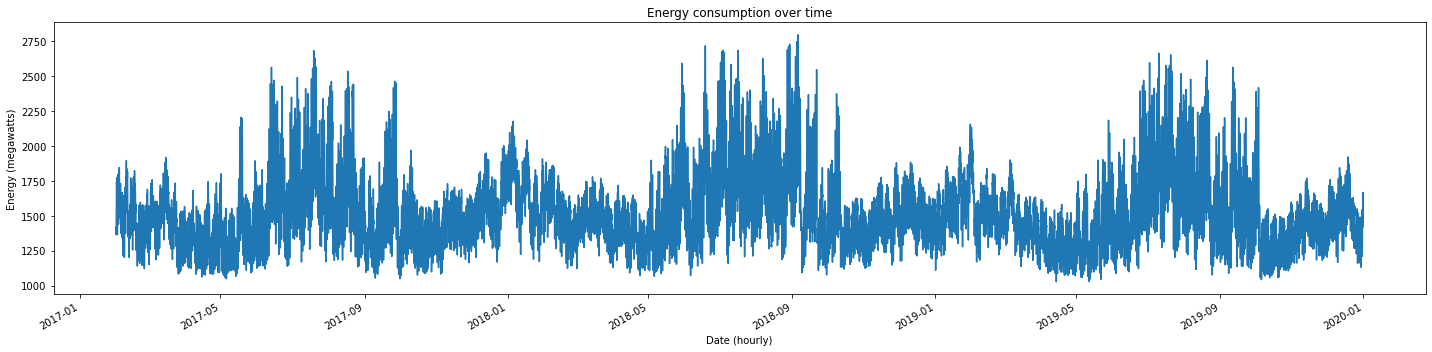

In [2]:
fig, ax = plt.subplots(figsize=(20, 5))

plt.title('Energy consumption over time')

ax.plot(train['mw'], label='Energe consumption')
ax.set_ylabel('Energy (megawatts)')
ax.set_xlabel('Date (hourly)')

fig.autofmt_xdate()
plt.tight_layout()

## Dive deeper and plot one week of the training energy data (energy usage on the y-axis and date on the x-axis).

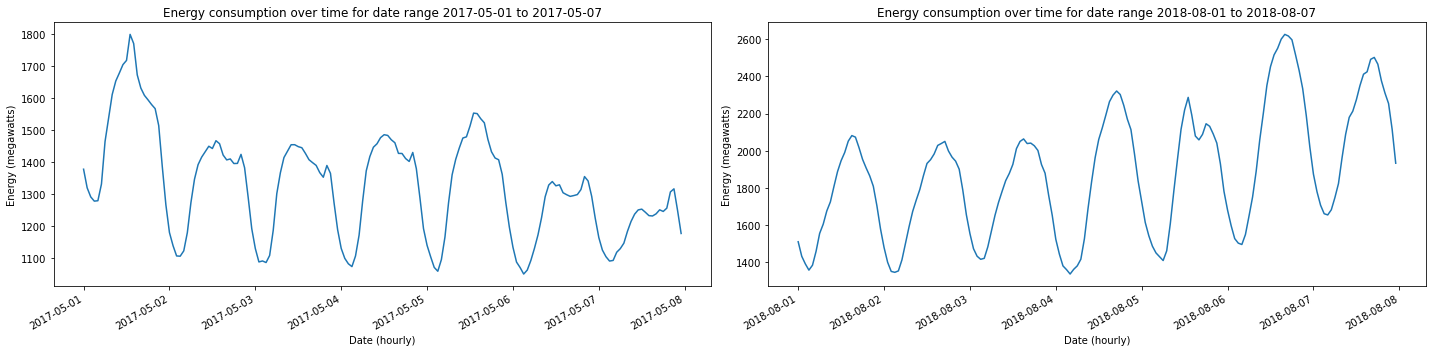

In [3]:
one_week_data = train['2017-05-01':'2017-05-07']
another_one_week_data = train['2018-08-01':'2018-08-07']

fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(20, 5))

plt.title('Energy consumption over time')

ax1.plot(one_week_data['mw'], label='Energe consumption')
ax1.set_ylabel('Energy (megawatts)')
ax1.set_xlabel('Date (hourly)')
ax1.set_title("Energy consumption over time for date range 2017-05-01 to 2017-05-07")

ax2.plot(another_one_week_data['mw'], label='Energe consumption')
ax2.set_ylabel('Energy (megawatts)')
ax2.set_xlabel('Date (hourly)')
ax2.set_title("Energy consumption over time for date range 2018-08-01 to 2018-08-07")

fig.autofmt_xdate()
plt.tight_layout()

## Plot the training temperature data over time (temperature on the y-axis and date on the x-axis).

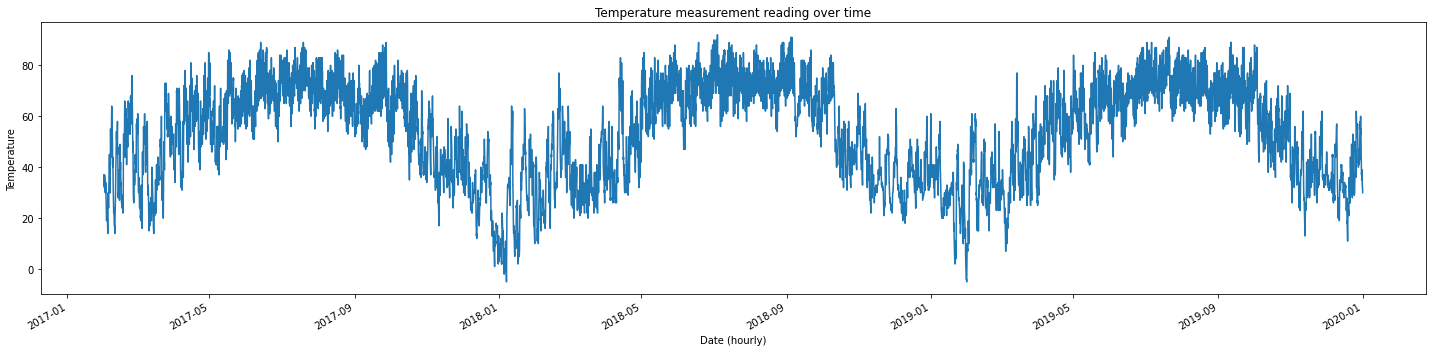

In [4]:
fig, ax = plt.subplots(figsize=(20, 5))

plt.title('Temperature measurement reading over time')

ax.plot(train['HourlyDryBulbTemperature'], label='Temperature')
ax.set_ylabel('Temperature')
ax.set_xlabel('Date (hourly)')

fig.autofmt_xdate()
plt.tight_layout()

In [5]:
#### It might help to overlay the plots from the energy and temperature data using a dual-axis line graph.

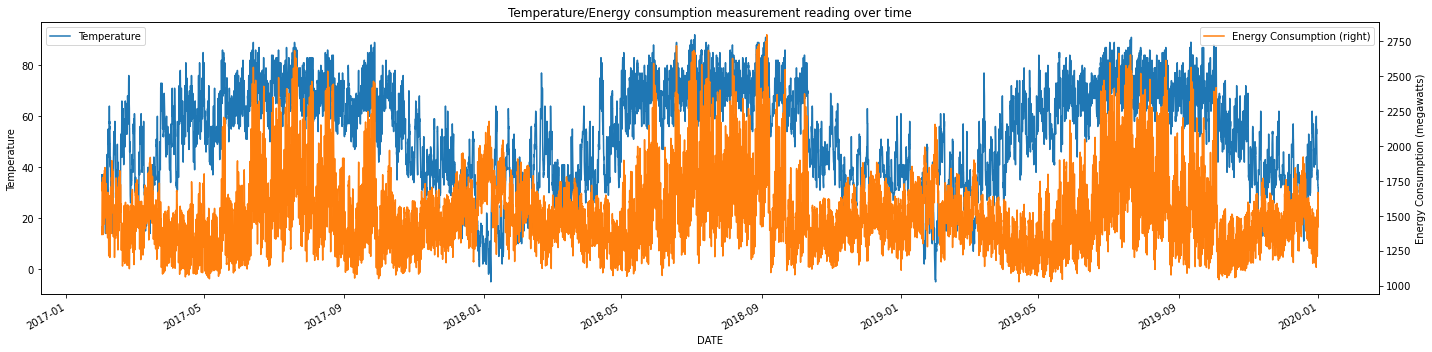

In [6]:
fig, ax = plt.subplots(figsize=(20, 5))

plt.title('Temperature/Energy consumption measurement reading over time')


train['HourlyDryBulbTemperature'].plot(ax=ax, label='Temperature')
ax.set_ylabel('Temperature')
ax.set_xlabel('Date (Hourly)')

sec_ax = train['mw'].plot(ax=ax, label='Energy Consumption', secondary_y=True)
sec_ax.set_ylabel('Energy Consumption (megawatts)')

ax.legend(loc=2)
sec_ax.legend(loc=1)

fig.autofmt_xdate()
plt.tight_layout()

## Dive deeper and plot one week of the training temperature data (temperature on the y-axis and date on the x-axis).

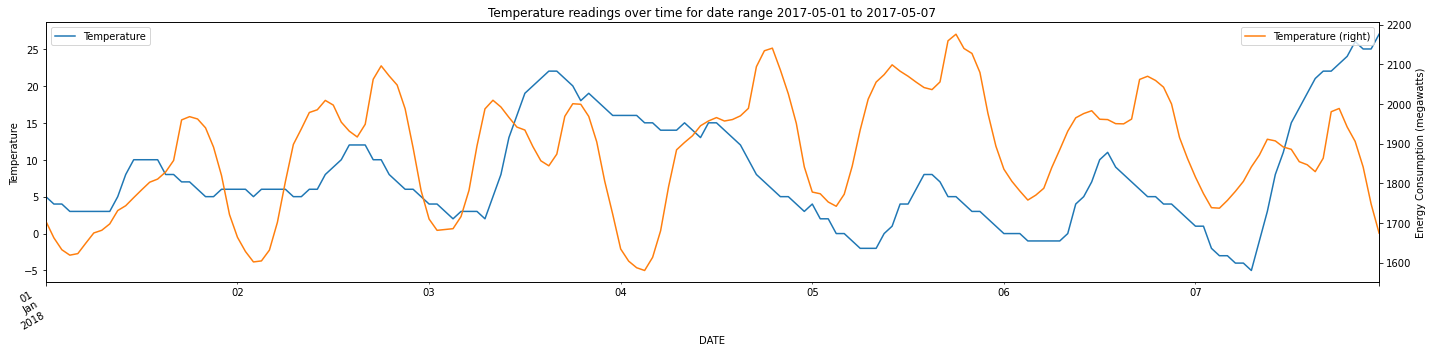

In [7]:
jan_week_data = train['2018-01-01':'2018-01-07']
july_one_week_data = train['2018-07-01':'2018-07-07']

fig, ax1 = plt.subplots(figsize=(20, 5))

jan_week_data['HourlyDryBulbTemperature'].plot(ax=ax1, label='Temperature')
ax1.set_ylabel('Temperature')
ax1.set_xlabel('Date (hourly)')
ax1.set_title("Temperature readings over time for date range 2017-05-01 to 2017-05-07")
sec_ax1 = jan_week_data['mw'].plot(ax=ax1, label='Temperature', secondary_y=True)
sec_ax1.set_ylabel('Energy Consumption (megawatts)')

ax1.legend(loc=2)
sec_ax1.legend(loc=1)

fig.autofmt_xdate()
plt.tight_layout()

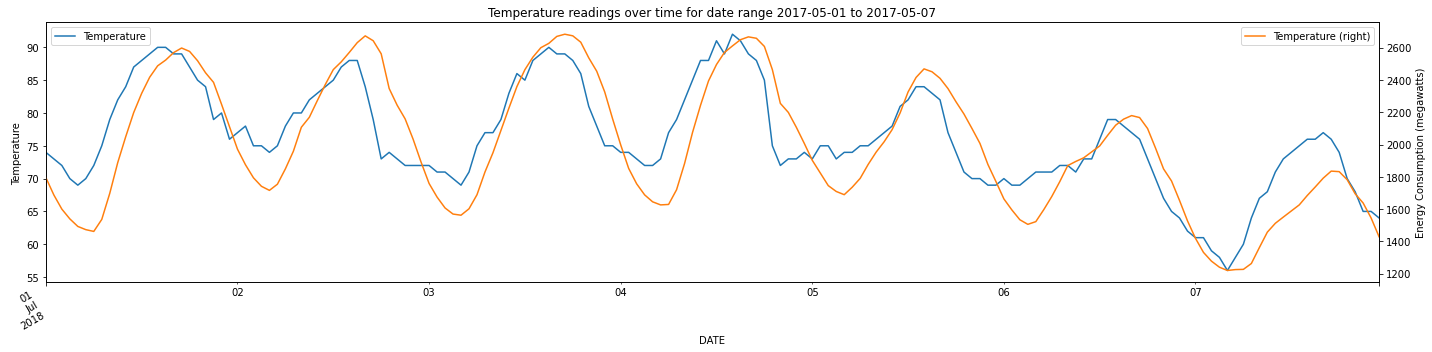

In [8]:
fig, ax1 = plt.subplots(figsize=(20, 5))

july_one_week_data['HourlyDryBulbTemperature'].plot(ax=ax1, label='Temperature')
ax1.set_ylabel('Temperature')
ax1.set_xlabel('Date (hourly)')
ax1.set_title("Temperature readings over time for date range 2017-05-01 to 2017-05-07")
sec_ax1 = july_one_week_data['mw'].plot(ax=ax1, label='Temperature', secondary_y=True)
sec_ax1.set_ylabel('Energy Consumption (megawatts)')

ax1.legend(loc=2)
sec_ax1.legend(loc=1)

fig.autofmt_xdate()
plt.tight_layout()

## Calculate the correlation of your training energy data with your training temperature data.

In [9]:
temp_energy_correlation = train[['mw', 'HourlyDryBulbTemperature']].corr()
temp_energy_correlation

,mw,HourlyDryBulbTemperature
mw,1.000000,0.323026
HourlyDryBulbTemperature,0.323026,1.000000


## Plot a scatterplot between your training temperature and energy data (energy usage on the y-axis and temperature on the x-axis).

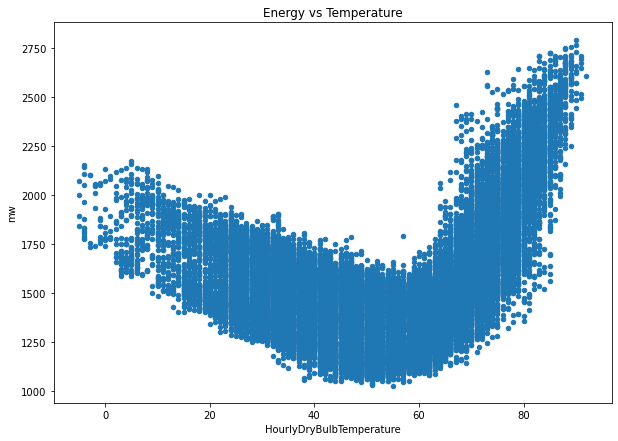

In [10]:
train.plot.scatter(x='HourlyDryBulbTemperature', y='mw', figsize=(10,7), title='Energy vs Temperature');